# Feature Learning - PCA - Carson Stevens

In this lecture we'll look at predicting a wine's cultivator from information about the wine. We will use the original data collected about wines and also use PCA to learn a different set of features. Then we will use $k$NN to classify the wines. 

We will also look at using Kernel PCA with a concentric circles dataset and see how well it can perform in separating the points when visualized.

In [0]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk

np.random.seed(0)

plt.style.use("ggplot")

In [0]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA, KernelPCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_circles

In [0]:
wine_data = load_wine()

In [64]:
wine_features = pd.DataFrame(wine_data["data"], columns=wine_data["feature_names"])
wine_targets = pd.DataFrame(wine_data["target"], columns=["class"])
print(wine_data["DESCR"])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [65]:
wine_features.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [66]:
wine_features.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [67]:
wine_targets.head()

,class
0,0
1,0
2,0
3,0
4,0


1    71
0    59
2    48
Name: class, dtype: int64


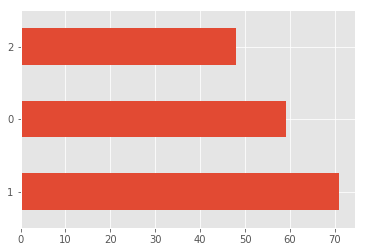

In [68]:
print(wine_targets["class"].value_counts())
wine_targets["class"].value_counts().plot(kind="barh")

In [0]:
X_train, X_test, y_train, y_test = train_test_split(wine_features, wine_targets, test_size=0.2, random_state=0)

With the wine data, we will apply [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) to 2 components to be able to visualize the data and then run a classifier on the original data as well as PCA and compare their performances.

In [0]:
# Set pca_tf to the PCA transformer using 2 components (case matters)
# Fit and transform X_train and save to X_train_pca
# Transform X_test and save to X_test_pca
pca_tf = PCA(n_components=2)
X_train_pca = pca_tf.fit_transform(X_train)
X_test_pca = pca_tf.fit_transform(X_test)

In [0]:
assert pca_tf
assert X_train_pca.shape == (142, 2)
assert X_test_pca.shape == (36,2)

Since PCA is maximizing the variance in each component, let's take a look at what that means with respect to our data.

In [72]:
pca_tf.explained_variance_ratio_

array([0.99882015, 0.00108308])

What does the explained variance ratio of our components tell us? Try running this again with more components and see what happens.

One of the benefits of PCA is it can easily allow us to visualize data that is in more than 3 dimensions. 

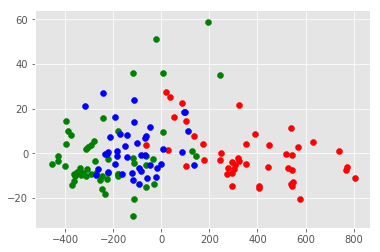

In [73]:
plt.scatter(X_train_pca[:,0].reshape(-1,1)[y_train == 0], X_train_pca[:,1].reshape(-1,1)[y_train == 0], color="r")
plt.scatter(X_train_pca[:,0].reshape(-1,1)[y_train == 1], X_train_pca[:,1].reshape(-1,1)[y_train == 1], color="g")
plt.scatter(X_train_pca[:,0].reshape(-1,1)[y_train == 2], X_train_pca[:,1].reshape(-1,1)[y_train == 2], color="b")
plt.show()

In [74]:
# Fit 2 knn classifier models, knn and knn_pca on the X_train and X_train_pca data respectively.
# You may use whatever k value you'd like to use or feel free to use a gridsearch and try to test out a few k values
knn = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
knn_pca = KNeighborsClassifier(n_neighbors=5).fit(X_train_pca, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [0]:
assert knn
assert knn_pca

In [76]:
print(f"The accuracy using kNN is {accuracy_score(y_test, knn.predict(X_test))}.")
print(f"The accuracy using kNN with PCA is {accuracy_score(y_test, knn_pca.predict(X_test_pca))}.")

The accuracy using kNN is 0.8055555555555556.
The accuracy using kNN with PCA is 0.7777777777777778.


PCA can help us visualize the data but it can come at a cost when we apply a machine learning model to its components. Often, the results are still worth the reduction in computation time when we have extremely large datasets. And sometimes we may achieve better results with PCA.

## Kernel PCA

In [0]:
X, y = make_circles(n_samples=400, factor=.3, noise=.05)
reds = y == 0
blues = y == 1

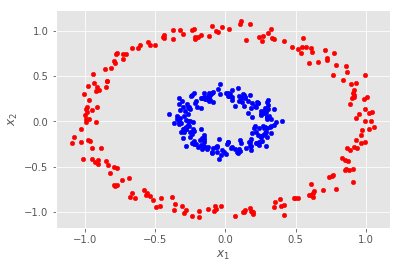

In [78]:
plt.scatter(X[reds, 0], X[reds, 1], c="r", s=20)
plt.scatter(X[blues, 0], X[blues, 1], c="b", s=20)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

In [0]:
# Apply a PCA transformation on X with 2 components
# Save the PCA transformer to pca_tf
# Save the transformed values of X to X_pca

pca_tf = PCA(n_components=2)
X_pca = pca_tf.fit_transform(X, y)

In [0]:
assert pca_tf
assert X_pca.shape == (400,2)

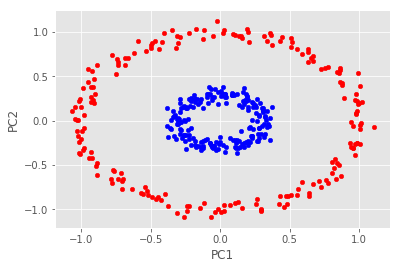

In [81]:
plt.scatter(X_pca[reds, 0], X_pca[reds, 1], c="r", s=20)
plt.scatter(X_pca[blues, 0], X_pca[blues, 1], c="b", s=20)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

We can see that there isn't much value in using traditional PCA. Let's try [kernel PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html#sklearn.decomposition.KernelPCA). We'll use the RBF kernel and try out different values for gamma. Also, set `fit_inverse_transform=True` to make sure we can do the remaining part of the exercise.

In [0]:
# Apply a Kernel PCA transformation on X with 2 components
# Save the Kernel PCA transformer to kpca_tf
# Save the transformed values of X to X_pca

kpca_tf = KernelPCA(n_components=2, kernel='rbf', fit_inverse_transform=True)
X_kpca = kpca_tf.fit_transform(X, y)

In [0]:
assert kpca_tf
assert X_kpca.shape == (400,2)

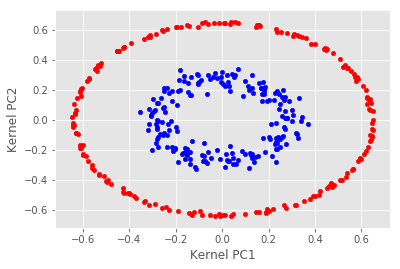

In [84]:
plt.scatter(X_kpca[reds, 0], X_kpca[reds, 1], c="r", s=20)
plt.scatter(X_kpca[blues, 0], X_kpca[blues, 1], c="b", s=20)
plt.xlabel("Kernel PC1")
plt.ylabel("Kernel PC2")
plt.show()

The inverse transformed data should look similar to the original data. What does how similar or different it is from the original tell us?

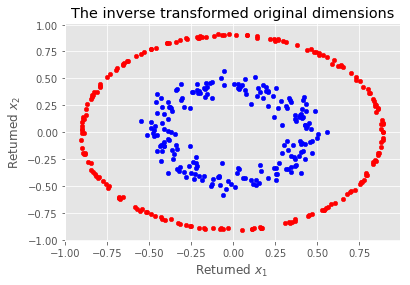

In [85]:
X_inverse = kpca_tf.inverse_transform(X_kpca)
plt.scatter(X_inverse[reds, 0], X_inverse[reds, 1], c="r", s=20)
plt.scatter(X_inverse[blues, 0], X_inverse[blues, 1], c="b", s=20)
plt.xlabel("Returned $x_1$ ")
plt.ylabel("Returned $x_2$")
plt.title("The inverse transformed original dimensions")
plt.show()

## Feedback

In [0]:
def feedback():
    """Provide feedback on the contents of this exercise
    
    Returns:
        string
    """
    return "This was a cool exercise to visually see how PCA helps differentiate data"

In [87]:
feedback()

'This was a cool exercise to visually see how PCA helps differentiate data'